In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron as skPerceptron

%matplotlib inline

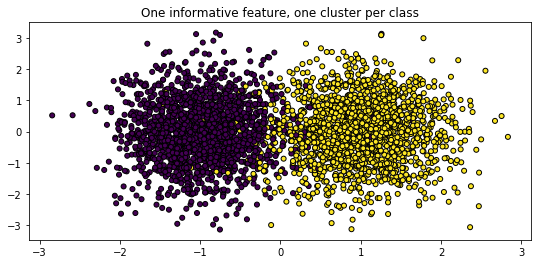

In [76]:
plt.figure(figsize=(9, 4))
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_samples=3500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [111]:
class Perceptron():
    
    def __init__(self, X, y):
        self._W = np.random.randn(X.shape[1]) * 1e-1
        self._B = np.random.randn(1) * 1e-1
        self.X = X
        self.y = y
    
    def _gradient(self, E):
        return (1 / self.X.shape[0]) * np.dot(self.X.T, E)
    
    def train(self, epochs=2500, lr=1e-3):
        error_step = []
        total_expected_error = 0
        for i in range(epochs):
            E = self.predict(self.X) - self.y
            gd = self._gradient(E)
            self._W -= lr * gd
            self._B -= np.sum(lr * gd)
            
            total_error = np.sum(E**2)
            if np.abs(total_expected_error-total_error) < 1e-15:
                return np.array(error_step)
            total_expected_error = total_error
            error_step.append(total_error)
        return np.array(error_step)
    
    def predict(self, Z):
        return np.where(np.dot(Z, self._W) + self._B >= 0.0, 1, 0)

Acurácia: 47.52%
Acurácia: 52.48%
Acurácia: 54.38%
Acurácia: 76.95%
Acurácia: 92.29%


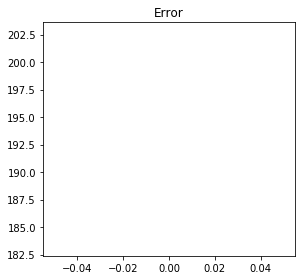

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

final_error = None
better_acc = 0
for _ in range(5):
    md = Perceptron(X_train.copy(), y_train.copy())
    error = md.train()

    predYm = md.predict(X_test)
    acc = np.round((np.sum(predYm == y_test) / len(y_test)) * 100, 2)
    print(f'Acurácia: {acc}%')
    if acc > better_acc:
        final_error = error
        better_acc = acc

if len(final_error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Error')
    plt.plot(range(len(error)), error)
    plt.tight_layout()
    plt.show()

In [110]:
for _ in range(5):
    clf = skPerceptron(max_iter=2500, tol=1e-3, alpha=1e-3)
    clf.fit(A, y_train)
    predY = clf.predict(B)
    print(f'Acurácia: {np.round(clf.score(B, y_test) * 100, 2)}%')

Acurácia: 95.62%
Acurácia: 95.62%
Acurácia: 95.62%
Acurácia: 95.62%
Acurácia: 95.62%
